# standardization jide vich sd 1 hoje ga te mean 0

In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.shape

(400, 5)

In [4]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
73,15782530,Female,33,113000,0
84,15798659,Female,30,62000,0
103,15675949,Female,33,149000,1
357,15671387,Female,41,72000,0
249,15753102,Female,35,97000,1


In [5]:
df=df.iloc[:,2:]

In [6]:
df.shape

(400, 3)

In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
282,37,70000,1
188,35,72000,0
49,31,89000,0
232,40,107000,1
221,35,91000,1


# train test split

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

x_train.shape,x_test.shape

((280, 2), (120, 2))

# standard scaler

In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# fit the scaler to train set,it will learn parmaeters
scaler.fit(x_train)    # mean te standard deviation like things calculate karlega

# hun apa transform karna dova te but see fit apa kale ik te hi kita si
x_train_scaled = scaler.transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [10]:
scaler.mean_


array([3.78642857e+01, 6.98071429e+04])

In [11]:
x_train_scaled=pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [12]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [13]:
x_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [14]:
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [15]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [16]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# effect of scaling

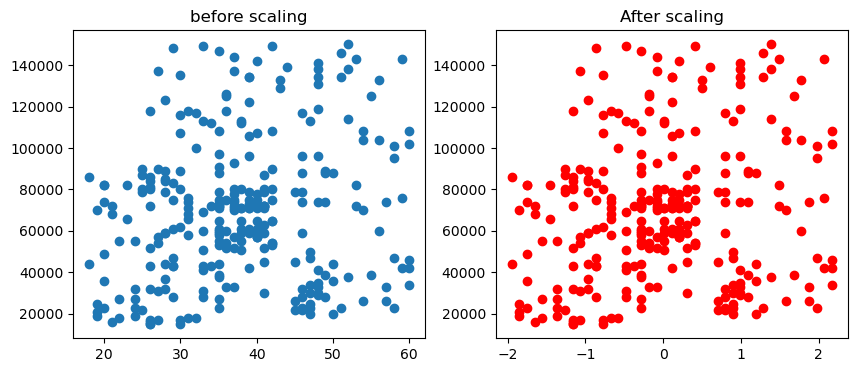

In [17]:
fig,(ax1, ax2)=plt.subplots(ncols=2,figsize=(10,4))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('before scaling')

ax2.scatter(x_train_scaled['Age'],x_train['EstimatedSalary'],color='r')
ax2.set_title('After scaling')

plt.show()

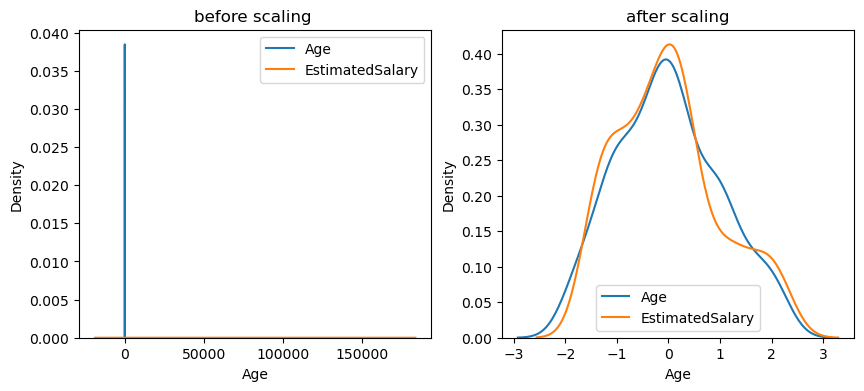

In [18]:
fig,(ax1, ax2)=plt.subplots(ncols=2,figsize=(10,4))

sns.kdeplot(x_train['Age'],label='Age',ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],label='EstimatedSalary',ax=ax1)
ax1.set_title('before scaling ')
ax1.legend()

sns.kdeplot(x_train_scaled['Age'],label='Age',ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],label='EstimatedSalary',ax=ax2)
ax2.set_title('after scaling')
ax2.legend()



plt.show()

## why scaling is important

In [19]:
from sklearn.linear_model import LogisticRegression



In [20]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [21]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [22]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.875
scaled 0.8666666666666667


In [25]:
# actual accuracy ghat hundi vaise like 67.7 honi chahidi aa